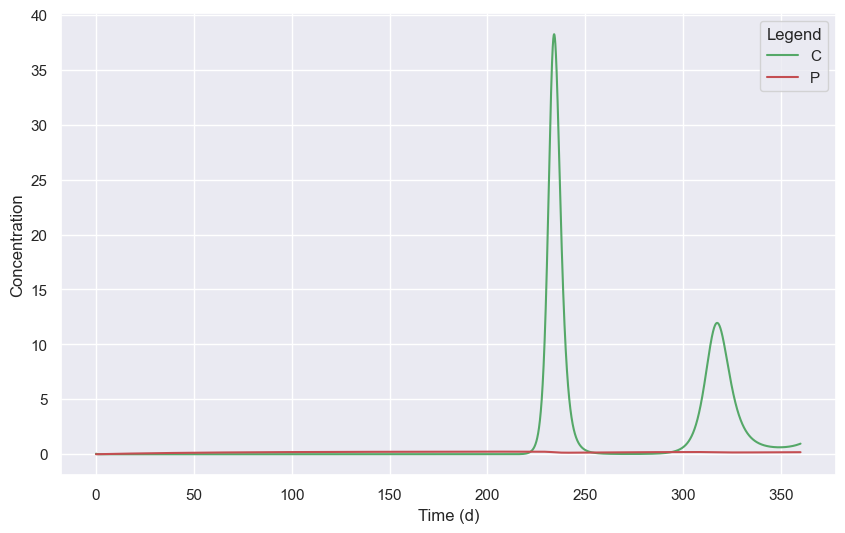

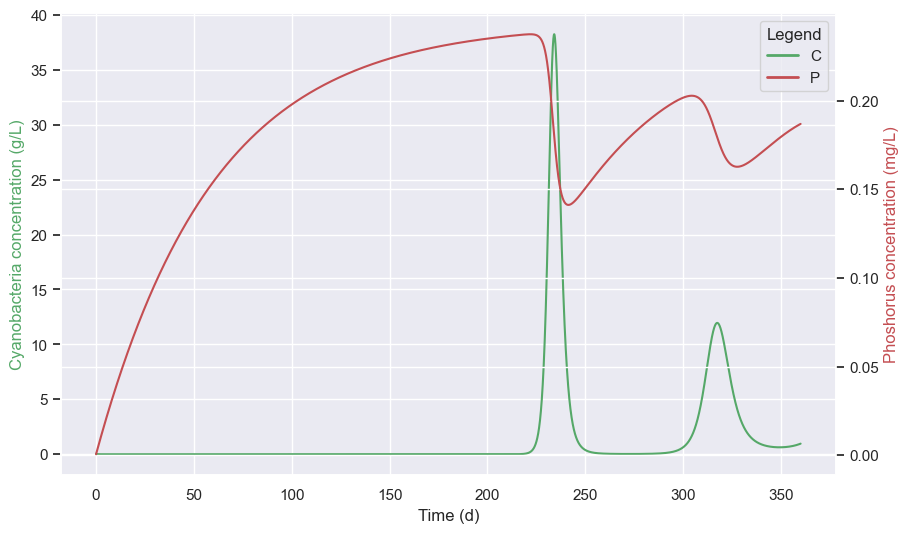

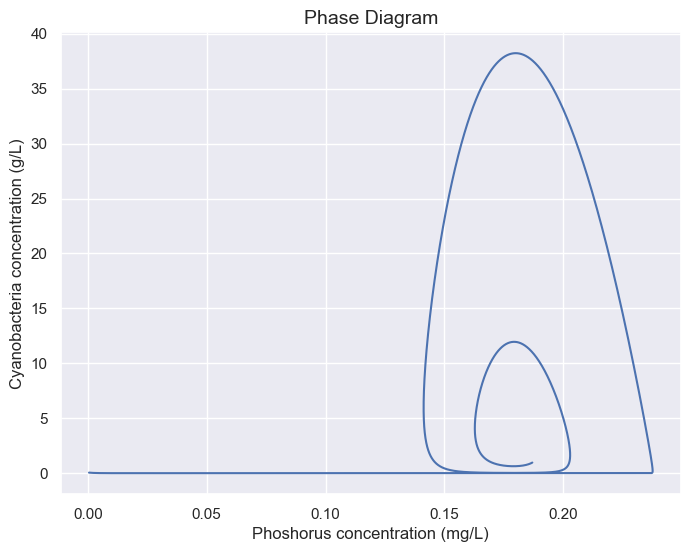

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
P0=0.0005
C0=0.05
args=np.array([9.33, 1.67, 4.17e-05, 4.07e-03,2.03e-03, 1.67e-02])
h = 0.005
dx = h
t = np.arange(0,360+ h, h)

def dC(t, C, P,a,b,c,d,e,f):
    return (a*C*P-b*C-c*C*C/P)
def dP(t, C, P,a,b,c,d,e,f):
    return (d-e*C*P-f*P)


import numpy as np
import matplotlib.pyplot as plt
import math
P0=0.0005
C0=0.05
args=np.array([9.33, 1.67, 4.17e-05, 4.07e-03,2.03e-03, 1.67e-02])
h = 0.005
dx = h
t = np.arange(0,360+ h, h)

def dC(t, C, P,a,b,c,d,e,f):
    return (a*C*P-b*C-c*C*C/P)
def dP(t, C, P,a,b,c,d,e,f):
    return (d-e*C*P-f*P)


def run_simulation(t,C0,P0,args):
    C = np.zeros(len(t))
    P = np.zeros(len(t))
    C[0] = C0
    P[0] = P0

    for i in range(0,len(t)-1):
        if P[i]<=1e-8:
            C[i]=0
        if C[i]<=0 and P[i]>=1e-8:
            C[i]=1e-7

        k11=dC(t[i],C[i], P[i],*args)
        k21=dP(t[i],C[i], P[i],*args)

        k12=dC(t[i]+0.5*dx,C[i]+0.5*k11*dx, P[i]+0.5*k21*dx,*args)
        k22=dP(t[i]+0.5*dx,C[i]+0.5*k11*dx, P[i]+0.5*k21*dx,*args)

        k13=dC(t[i]+0.5*dx, C[i]+0.5*k12*dx, P[i]+0.5*k22*dx,*args)
        k23=dP(t[i]+0.5*dx, C[i]+0.5*k12*dx, P[i]+0.5*k22*dx,*args)

        k14=dC(t[i]+dx, C[i]+k13*dx, P[i]+k23*dx,*args)
        k24=dP(t[i]+dx, C[i]+k13*dx, P[i]+k23*dx,*args)

        C[i + 1]=C[i]+(1/6)*(k11+2*k12+2*k13+k14)*dx
        P[i + 1]=P[i]+(1/6)*(k21+2*k22+2*k23+k24)*dx

    return C, P

C,P=run_simulation(t,C0,P0,args)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=t, y=C, label="C", color="g")
sns.lineplot(x=t, y=P, label="P", color="r")

plt.xlabel("Time (d)", fontsize=12)
plt.ylabel("Concentration", fontsize=12)
plt.legend(title="Legend")
plt.show()

# Dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

sns.lineplot(x=t, y=C, ax=ax1, color="g", label=None)
sns.lineplot(x=t, y=P, ax=ax2, color="r", label=None)


ax1.set_xlabel("Time (d)", fontsize=12)
ax1.set_ylabel("Cyanobacteria concentration (g/L)", color="g", fontsize=12)
ax2.set_ylabel("Phoshorus concentration (mg/L)", color="r", fontsize=12)
ax1_lines = [plt.Line2D([0], [0], color="g", lw=2, label="C")]
ax2_lines = [plt.Line2D([0], [0], color="r", lw=2, label="P")]
ax1.legend(handles=ax1_lines + ax2_lines, loc="upper right", title="Legend")
ax1.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(x=P, y=C, color="b", sort=False)  
plt.title("Phase Diagram", fontsize=14)
plt.xlabel("Phoshorus concentration (mg/L)", fontsize=12)
plt.ylabel("Cyanobacteria concentration (g/L)", fontsize=12)
plt.grid(True)

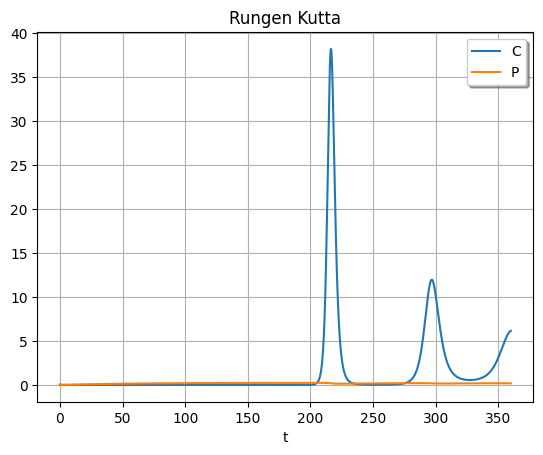

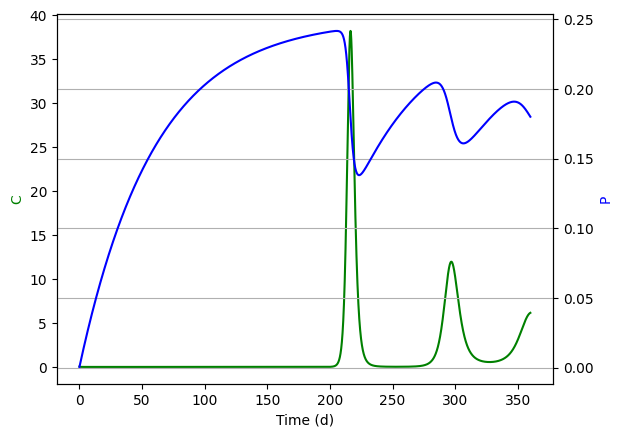

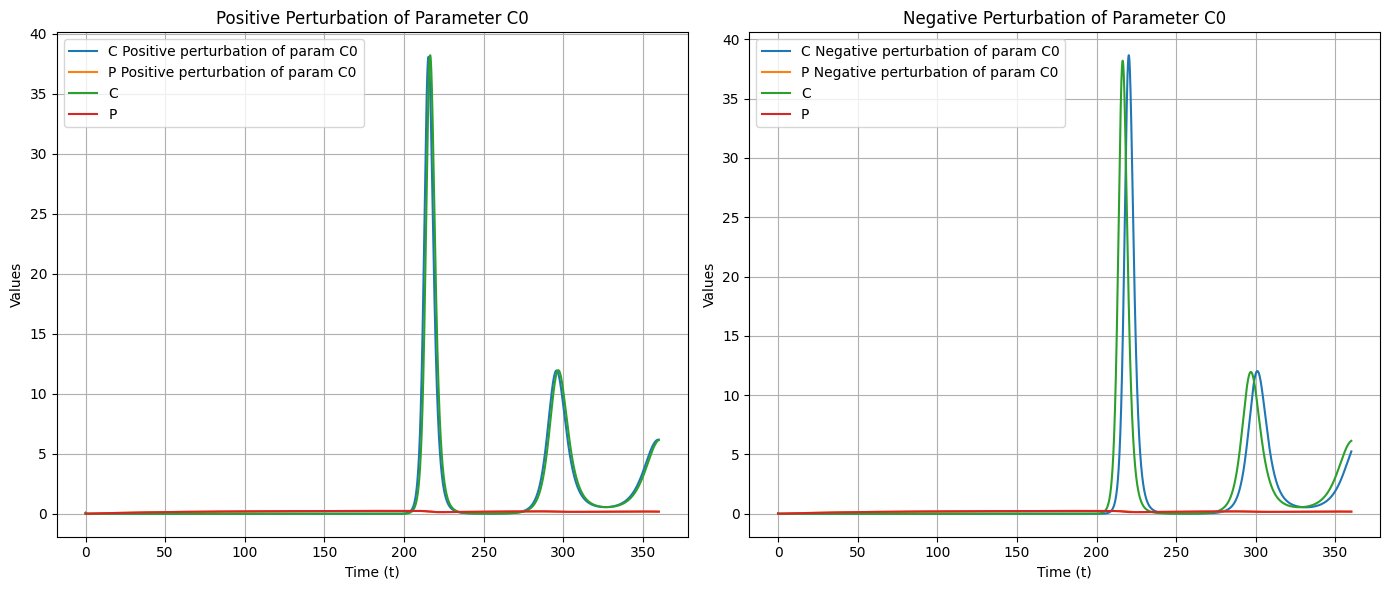

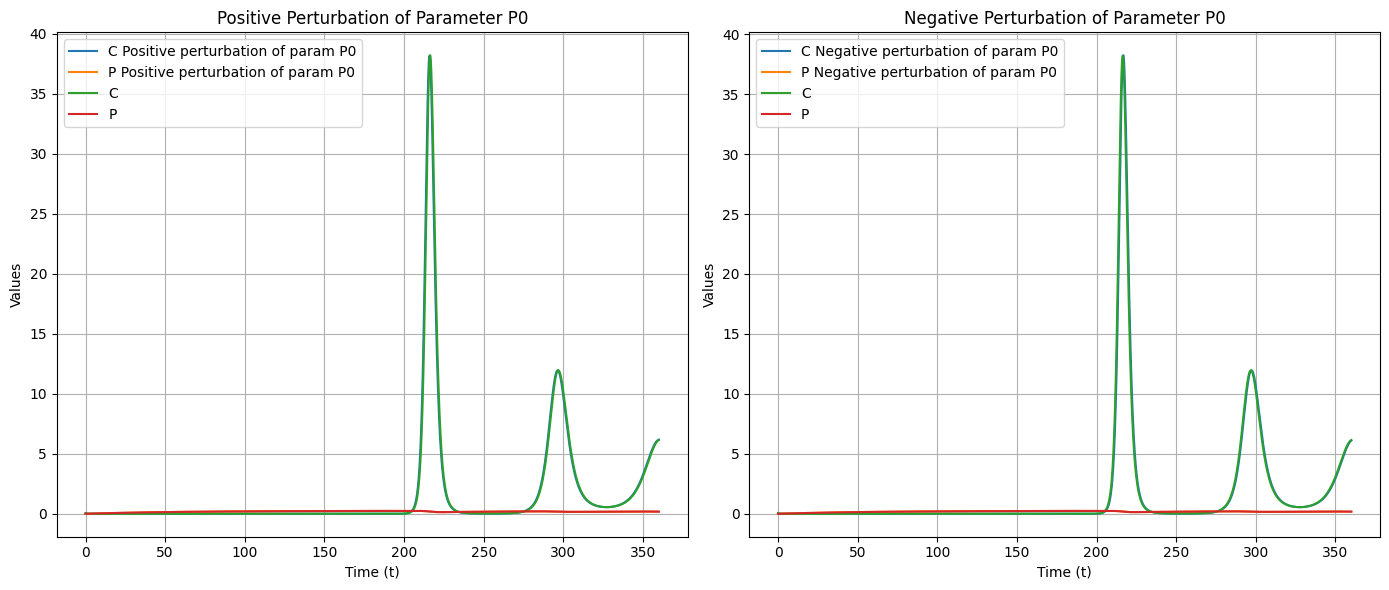

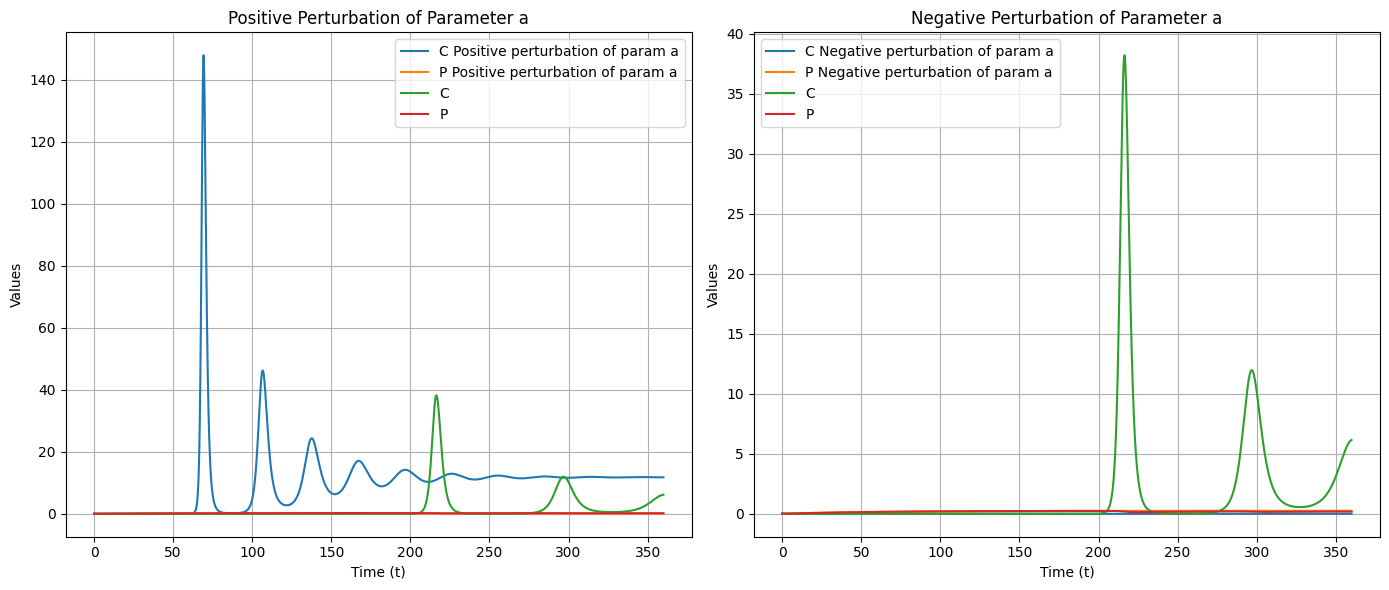

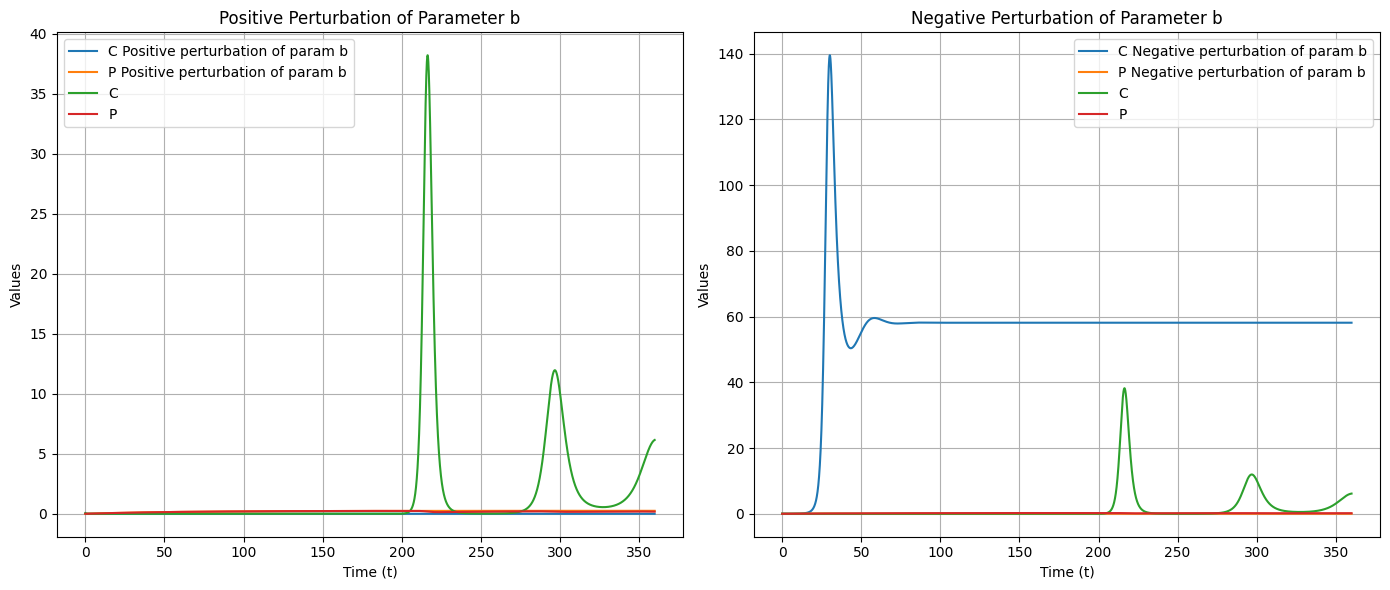

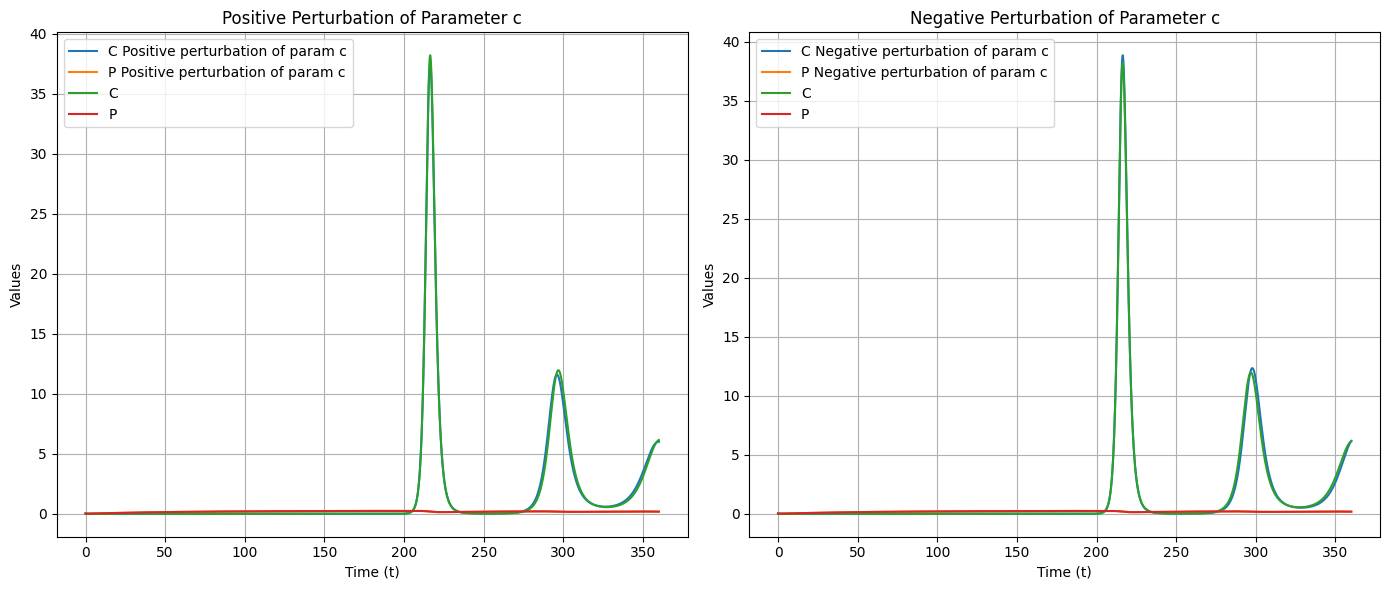

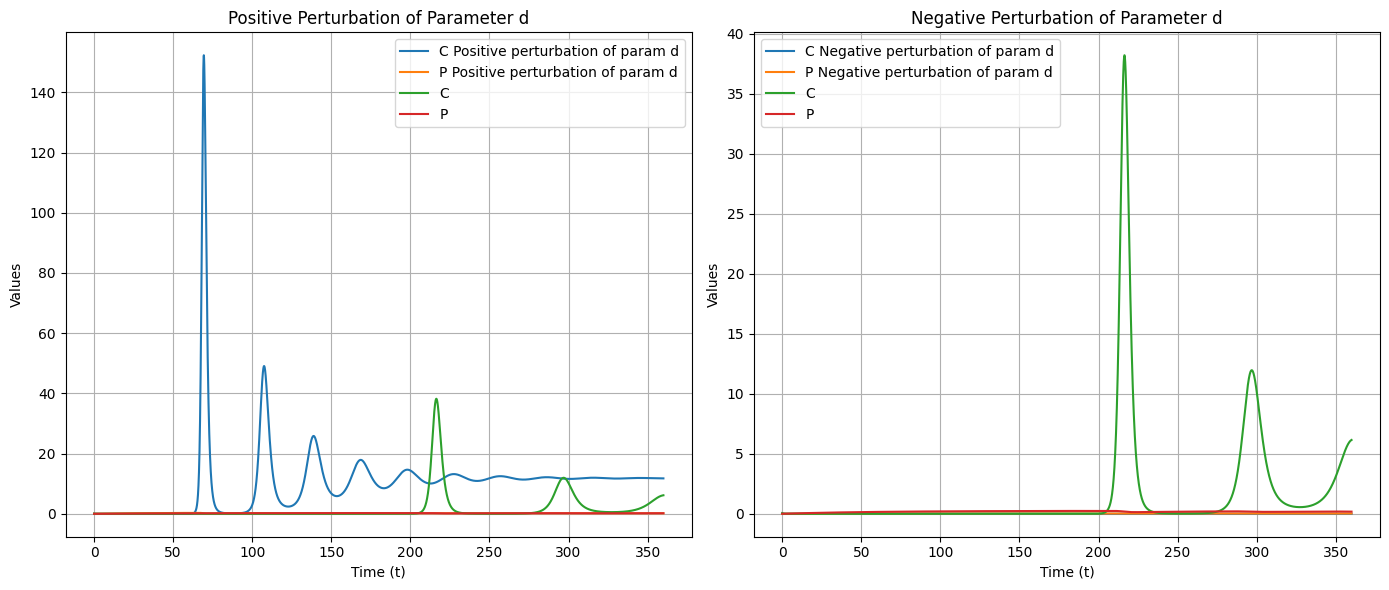

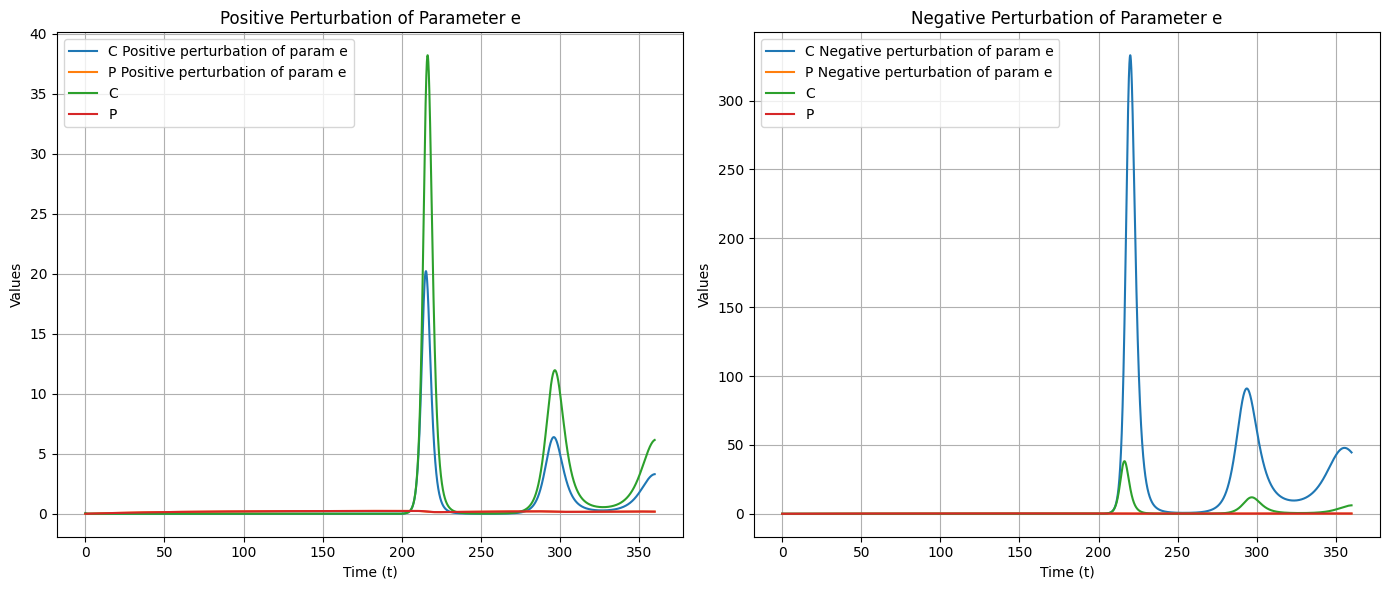

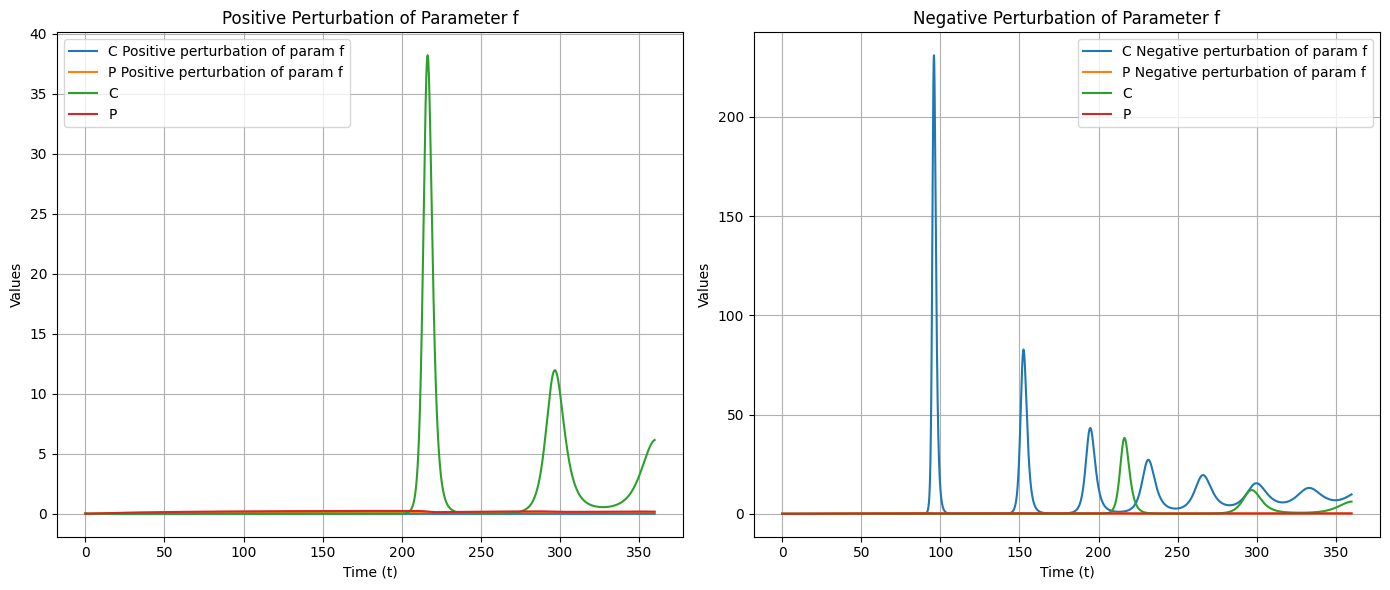

In [29]:
##Visual exploration

h = 0.005
dx = h
t = np.arange(0,360+ h, h)
P0=1
C0=10
base_args =args
C,P=run_simulation(t,base_args)
plt.plot(t, C)
plt.plot(t, P)
plt.legend(['C','P'], shadow=True)
plt.title('Rungen Kutta')
plt.xlabel('t')
plt.grid()
plt.show()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t, C, 'g-')
plt.grid(True, axis='both')
ax2.plot(t, P, 'b-')

ax1.set_xlabel('Time (d)')

ax1.set_ylabel('C', color='g')
ax2.set_ylabel('P', color='b')
plt.grid(True, axis='both')
plt.show()

parameter_indices = [0, 1, 2, 3, 4,5,6,7]
parameter_names=["C0","P0","a", "b", "c", "d", "e","f"]
perturbation_size = 0.9  # % perturbation

for index in parameter_indices:
    perturbed_args = base_args.copy()
    
    # Perturb parameter positively
    perturbed_args[index] = base_args[index] * (1 + perturbation_size)
    C_pos, P_pos = run_simulation(t,perturbed_args)
    
    # Perturb parameter negatively
    perturbed_args[index] = base_args[index] * (1 - perturbation_size)
    C_neg, P_neg = run_simulation(t,perturbed_args)

    # Plot results for positive perturbation
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(t, C_pos, label=f'C Positive perturbation of param {parameter_names[index]}')
    plt.plot(t, P_pos, label=f'P Positive perturbation of param {parameter_names[index]}')
    plt.plot(t, C, label=f'C')
    plt.plot(t, P, label=f'P')
    plt.xlabel('Time (t)')
    plt.ylabel('Values')
    plt.title(f'Positive Perturbation of Parameter {parameter_names[index]}')
    plt.legend()
    plt.grid()

    # Plot results for negative perturbation
    plt.subplot(1, 2, 2)
    plt.plot(t, C_neg, label=f'C Negative perturbation of param {parameter_names[index]}')
    plt.plot(t, P_neg, label=f'P Negative perturbation of param {parameter_names[index]}')
    plt.plot(t, C, label=f'C')
    plt.plot(t, P, label=f'P')
    plt.xlabel('Time (t)')
    plt.ylabel('Values')
    plt.title(f'Negative Perturbation of Parameter {parameter_names[index]}')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (8,).

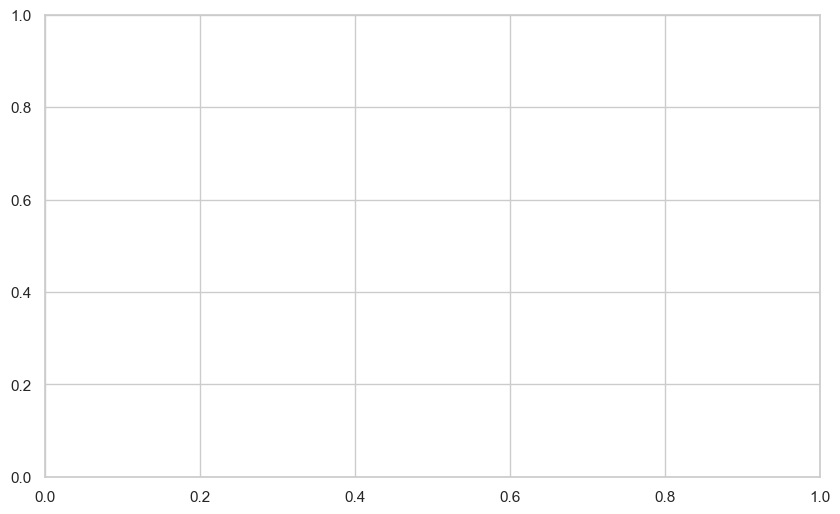

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


parameters = problem['names']
s1_indices = sobol_indices['S1']
st_indices = sobol_indices['ST']

sns.set(style="whitegrid")


width = 0.1
x = np.arange(len(parameters)) 
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, s1_indices, width=width, color='skyblue', label='First-order', alpha=0.8)
plt.bar(x + width/2, st_indices, width=width, color='salmon', label='Total-order', alpha=0.8)
plt.xticks(x, [f"$\\mathit{{{param}}}$" for param in parameters])
plt.ylabel('Sensitivity Index')
plt.xlabel('Parameter')
plt.title('Sobol Sensitivity Indices for Parameters')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


#First-order Sobol indices: [0.         0.         0.03387778 0.02354478 0.02762392 0.01270066
# 0.04841581 0.01917122]
#Total Sobol indices: [0.         0.         0.60757041 0.72037411 0.28232133 0.41814895
# 0.8378599  0.21023657]
#los de abajo son
#First-order Sobol indices: [0.         0.         0.00730233 0.00166221 0.00387691 0.00510204
 #0.11695484 0.01481884]
#Total Sobol indices: [0.         0.         0.03464828 0.0101008  0.32158232 0.31643857
 #0.87480452 0.81483163]

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import sobol as sobol_sample  
from SALib.analyze import sobol
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

P0=0.0005
C0=0.05

problem = {
    'num_vars': 6,
    'names': ['a', 'b', 'c', 'd', 'e','f'],
    'bounds': [[4.16666667e-05, 50] for i in range(6)]
}


param_values = sobol_sample.sample(problem, 1024)  
output_metrics = []

for params_set in param_values:
    C, P = run_simulation(t,C0,P0, params_set)
    if np.isfinite(np.mean(C))==True: 
        output_metric = np.mean(C)
        output_metrics.append(output_metric)

output_metrics = np.array(output_metrics)
sobol_indices = sobol.analyze(problem, output_metrics)

print("First-order Sobol indices:", sobol_indices['S1'])
print("Total Sobol indices:", sobol_indices['ST'])
sns.set(style="whitegrid")

parameters = problem['names']
s1_indices = sobol_indices['S1']
st_indices = sobol_indices['ST']
width = 0.1
x = np.arange(len(parameters)) 
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, s1_indices, width=width, color='skyblue', label='First-order', alpha=0.8)
plt.bar(x + width/2, st_indices, width=width, color='salmon', label='Total-order', alpha=0.8)
plt.xticks(x, [f"$\\mathit{{{param}}}$" for param in parameters])
plt.ylabel('Sensitivity Index')
plt.xlabel('Parameter')
plt.title('Sobol Sensitivity Indices for Parameters')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\JUAN DAVID\AppData\Local\Temp\ipykernel_14180\2013040109.py:12: RuntimeWarning: overflow encountered in scalar multiply
  return (a*C*P-b*C-c*C*C/P)
C:\Users\JUAN DAVID\AppData\Local\Temp\ipykernel_14180\2013040109.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  return (a*C*P-b*C-c*C*C/P)
C:\Users\JUAN DAVID\AppData\Local\Temp\ipykernel_14180\2013040109.py:14: RuntimeWarning: overflow encountered in scalar multiply
  return (d-e*C*P-f*P)
C:\Users\JUAN DAVID\AppData\Local\Temp\ipykernel_14180\2013040109.py:32: RuntimeWarning: invalid value encountered in scalar add
  k12=dC(t[i]+0.5*dx,C[i]+0.5*k11*dx, P[i]+0.5*k21*dx,*args)
C:\Users\JUAN DAVID\AppData\Local\Temp\ipykernel_14180\2013040109.py:33: RuntimeWarning: invalid value encountered in scalar add
  k22=dP(t[i]+0.5*dx,C[i]+0.5*k11*dx, P[i]+0.5*k21*dx,*args)


RuntimeError: 
        Incorrect number of samples in model output file.
        Confirm that calc_second_order matches option used during sampling.

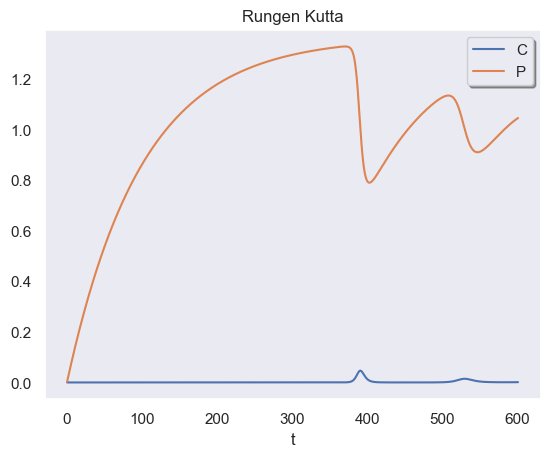

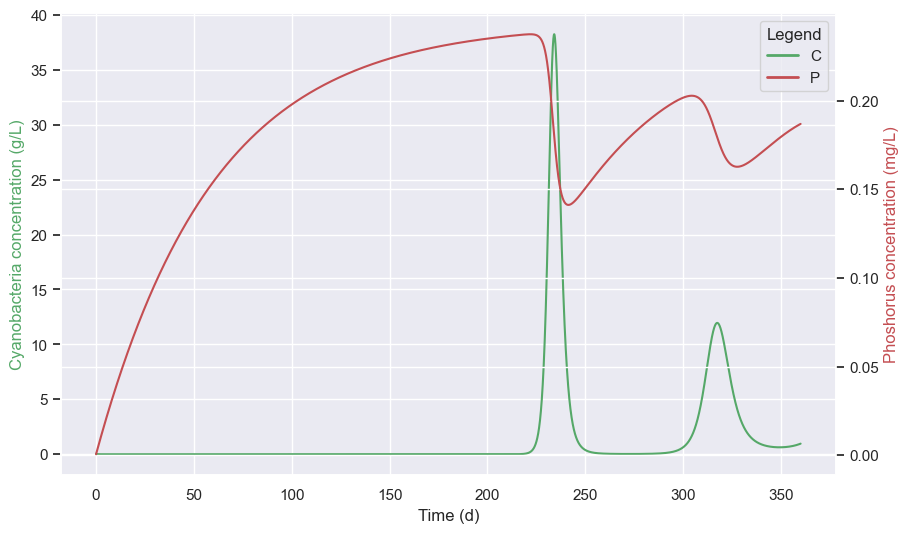

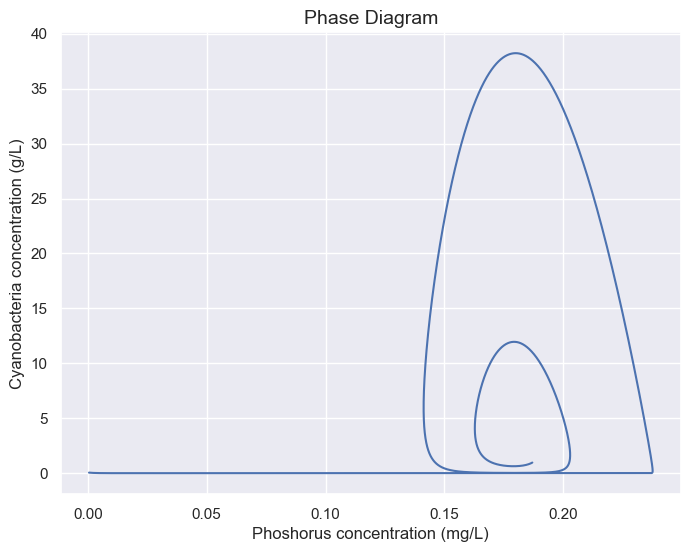

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
P0=0.0005
C0=0.05
h = 0.005
dx = h
a=9.33
b=1.67
c=4.17e-05
d=4.07e-03
e=2.03e-03
f=1.67e-02
H=a*c/(b*e)
I=a*d/(b*b)
L=f/b
P0=P0/(b/a)
C0=C0/(b/e)
#t = np.arange(0,360+ h, h)
def dCad(t, C, P,H,I,L):
    return (C*P-C-H*C*C/P)
def dPad(t, C, P,H,I,L):
    return (I-C*P-L*P)
    
args=np.array([H,I,L])
tad = np.arange(0,360*b+ h*b, h*b)
dx=dx*b
def run_adsimulation(t,C0,P0,args):
    C = np.zeros(len(t))
    P = np.zeros(len(t))
    C[0] = C0
    P[0] = P0

    for i in range(0,len(t)-1):
        if P[i]<=1e-8/(b/a):
            C[i]=0
        if C[i]<=0 and P[i]>=1e-8/(b/a):
            C[i]=1e-7/(b/e)

        k11=dCad(t[i],C[i], P[i],*args)
        k21=dPad(t[i],C[i], P[i],*args)
    
        k12=dCad(t[i]+0.5*dx,C[i]+0.5*k11*dx, P[i]+0.5*k21*dx,*args)
        k22=dPad(t[i]+0.5*dx,C[i]+0.5*k11*dx, P[i]+0.5*k21*dx,*args)
    
        k13=dCad(t[i]+0.5*dx, C[i]+0.5*k12*dx, P[i]+0.5*k22*dx,*args)
        k23=dPad(t[i]+0.5*dx, C[i]+0.5*k12*dx, P[i]+0.5*k22*dx,*args)
    
        k14=dCad(t[i]+dx, C[i]+k13*dx, P[i]+k23*dx,*args)
        k24=dPad(t[i]+dx, C[i]+k13*dx, P[i]+k23*dx,*args)
    
        C[i + 1]=C[i]+(1/6)*(k11+2*k12+2*k13+k14)*dx
        P[i + 1]=P[i]+(1/6)*(k21+2*k22+2*k23+k24)*dx
    
    return C, P
    
Cad,Pad=run_adsimulation(tad,C0,P0,args)
Cres=Cad*(b/e)
Pres=Pad*(b/a)
t = tad/b
plt.plot(tad, Cad)
plt.plot(tad, Pad)
plt.legend(['C','P'], shadow=True)
plt.title('Rungen Kutta')
plt.xlabel('t')
plt.grid()
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

sns.lineplot(x=t, y=C, ax=ax1, color="g", label=None)
sns.lineplot(x=t, y=P, ax=ax2, color="r", label=None)


ax1.set_xlabel("Time (d)", fontsize=12)
ax1.set_ylabel("Cyanobacteria concentration (g/L)", color="g", fontsize=12)
ax2.set_ylabel("Phoshorus concentration (mg/L)", color="r", fontsize=12)
ax1_lines = [plt.Line2D([0], [0], color="g", lw=2, label="C")]
ax2_lines = [plt.Line2D([0], [0], color="r", lw=2, label="P")]
ax1.legend(handles=ax1_lines + ax2_lines, loc="upper right", title="Legend")
ax1.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(x=P, y=C, color="b", sort=False)  
plt.title("Phase Diagram", fontsize=14)
plt.xlabel("Phoshorus concentration (mg/L)", fontsize=12)
plt.ylabel("Cyanobacteria concentration (g/L)", fontsize=12)
plt.grid(True)

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import sobol as sobol_sample  
from SALib.analyze import sobol
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Dimensionless sensitivity analysis
H=a*c/(b*e)
I=a*d/(b*b)
L=f/b
P0=P0/(b/a)
C0=C0/(b/e)
t = np.arange(0,360*b+ h*b, h*b)
problem = {
    'num_vars': 3,
    'names': ['H','I','L'],
    'bounds': [[0, 50] for i in range(3)]
}


param_values = sobol_sample.sample(problem, 512)  
output_metrics = []

for params_set in param_values:
    C, P = run_adsimulation(t,C0,P0, params_set)
    output_metric = np.mean(C)
    output_metrics.append(output_metric)


output_metrics = np.array(output_metrics)
sobol_indices = sobol.analyze(problem, output_metrics)

print("First-order Sobol indices:", sobol_indices['S1'])
print("Total Sobol indices:", sobol_indices['ST'])
sns.set(style="whitegrid")

parameters = problem['names']
s1_indices = sobol_indices['S1']
st_indices = sobol_indices['ST']
width = 0.1
x = np.arange(len(parameters)) 
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, s1_indices, width=width, color='skyblue', label='First-order', alpha=0.8)
plt.bar(x + width/2, st_indices, width=width, color='salmon', label='Total-order', alpha=0.8)
plt.xticks(x, [f"$\\mathit{{{param}}}$" for param in parameters])
plt.ylabel('Sensitivity Index')
plt.xlabel('Parameter')
plt.title('Sobol Sensitivity Indices for Parameters')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

First-order Sobol indices: [0.01505284 0.0373685  0.34906273]
Total Sobol indices: [0.40845089 0.363467   0.55821147]
